In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx import *
import random
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.approximation import min_weighted_dominating_set
# from networkx.algorithms.approximation import dominating_set





In [75]:
random.seed(42)
N=10
x_vals = random.sample(range(1, 3*N), N)
y_vals = random.sample(range(1, 3*N), N)
z_vals = [0]*N

coordinates = list(zip(x_vals,y_vals,z_vals))

In [76]:
coordinates

[(21, 3, 0),
 (4, 19, 0),
 (1, 14, 0),
 (24, 2, 0),
 (9, 1, 0),
 (8, 29, 0),
 (26, 7, 0),
 (5, 8, 0),
 (28, 17, 0),
 (18, 20, 0)]

In [77]:
A = np.array(coordinates)
print(A)

[[21  3  0]
 [ 4 19  0]
 [ 1 14  0]
 [24  2  0]
 [ 9  1  0]
 [ 8 29  0]
 [26  7  0]
 [ 5  8  0]
 [28 17  0]
 [18 20  0]]


In [78]:
B = squareform(pdist(A))
print(B)
# B = list(B)
# print(B)

[[ 0.         23.34523506 22.82542442  3.16227766 12.16552506 29.06888371
   6.40312424 16.76305461 15.65247584 17.2626765 ]
 [23.34523506  0.          5.83095189 26.2488095  18.68154169 10.77032961
  25.05992817 11.04536102 24.08318916 14.03566885]
 [22.82542442  5.83095189  0.         25.94224354 15.26433752 16.55294536
  25.96150997  7.21110255 27.16615541 18.02775638]
 [ 3.16227766 26.2488095  25.94224354  0.         15.03329638 31.38470965
   5.38516481 19.92485885 15.5241747  18.97366596]
 [12.16552506 18.68154169 15.26433752 15.03329638  0.         28.01785145
  18.02775638  8.06225775 24.8394847  21.02379604]
 [29.06888371 10.77032961 16.55294536 31.38470965 28.01785145  0.
  28.42534081 21.21320344 23.32380758 13.45362405]
 [ 6.40312424 25.05992817 25.96150997  5.38516481 18.02775638 28.42534081
   0.         21.02379604 10.19803903 15.26433752]
 [16.76305461 11.04536102  7.21110255 19.92485885  8.06225775 21.21320344
  21.02379604  0.         24.69817807 17.69180601]
 [15.652

<class 'networkx.classes.graph.Graph'>


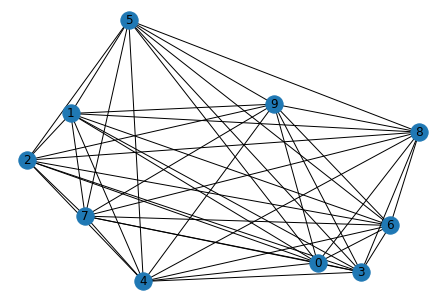

In [80]:
G = networkx.from_numpy_matrix(B)
position_dict = {}
for i in range(N):
    position_dict[i] = [x_vals[i], y_vals[i]]
nx.draw(G, with_labels = True, pos = position_dict)
print(type(G) )

In [81]:
for i in range(5):
    for j in range(5):
        if G.get_edge_data(i,j) !=None:
            print( "i=",i,"j=",j,G.get_edge_data(i,j)['weight'])

i= 0 j= 1 23.345235059857504
i= 0 j= 2 22.825424421026653
i= 0 j= 3 3.1622776601683795
i= 0 j= 4 12.165525060596439
i= 1 j= 0 23.345235059857504
i= 1 j= 2 5.830951894845301
i= 1 j= 3 26.248809496813376
i= 1 j= 4 18.681541692269406
i= 2 j= 0 22.825424421026653
i= 2 j= 1 5.830951894845301
i= 2 j= 3 25.942243542145693
i= 2 j= 4 15.264337522473747
i= 3 j= 0 3.1622776601683795
i= 3 j= 1 26.248809496813376
i= 3 j= 2 25.942243542145693
i= 3 j= 4 15.033296378372908
i= 4 j= 0 12.165525060596439
i= 4 j= 1 18.681541692269406
i= 4 j= 2 15.264337522473747
i= 4 j= 3 15.033296378372908


In [82]:
for i in range(5):
    for j in range(5):
        if (i!=j):
            if G.get_edge_data(i,j) !=None:
                if (G.get_edge_data(i,j)['weight']>5):
                    print("i=",i, "j=",j)
                    G.remove_edge(i,j)

i= 0 j= 1
i= 0 j= 2
i= 0 j= 4
i= 1 j= 2
i= 1 j= 3
i= 1 j= 4
i= 2 j= 3
i= 2 j= 4
i= 3 j= 4


In [83]:
for i in range(5):
    for j in range(5):
        print( "i=",i,"j=",j,G.get_edge_data(i,j))
# print( G.get_edge_data(2,1))           

i= 0 j= 0 None
i= 0 j= 1 None
i= 0 j= 2 None
i= 0 j= 3 {'weight': 3.1622776601683795}
i= 0 j= 4 None
i= 1 j= 0 None
i= 1 j= 1 None
i= 1 j= 2 None
i= 1 j= 3 None
i= 1 j= 4 None
i= 2 j= 0 None
i= 2 j= 1 None
i= 2 j= 2 None
i= 2 j= 3 None
i= 2 j= 4 None
i= 3 j= 0 {'weight': 3.1622776601683795}
i= 3 j= 1 None
i= 3 j= 2 None
i= 3 j= 3 None
i= 3 j= 4 None
i= 4 j= 0 None
i= 4 j= 1 None
i= 4 j= 2 None
i= 4 j= 3 None
i= 4 j= 4 None


In [84]:
vertex = nx.algorithms.approximation.min_weighted_vertex_cover(G)
print(vertex)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


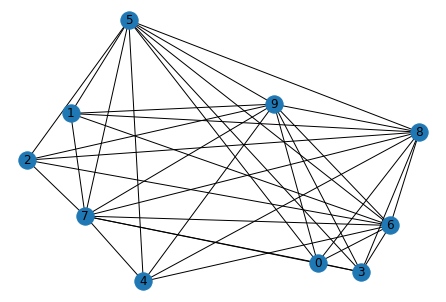

In [85]:
nx.draw(G, with_labels = True, pos = position_dict)

In [86]:
print(dominating_set(G))

{0, 1, 2, 4}


In [87]:
print (min_weighted_dominating_set(G))

{5}


In [70]:
list(G.nodes)

[0, 1, 2, 3, 4]

In [71]:
# from random import choice
# selected_nodes_list = []
# while (G.number_of_nodes() > 0):
#     all_nodes = list(G.nodes)
#     n_old = len(all_nodes)
#     print("no of nodes = ", n_old, " and they are ", all_nodes)
#     selected_node = random.choice(all_nodes) 
#     print("selected_node = ", selected_node)
#     neigh = list(G.neighbors(selected_node))
#     if len(neigh) == 0:
#         print("node ", selected_node, " has no neighbor")
#         selected_nodes_list.append(selected_node)
#         G.remove_node(selected_node)
    
#     else:
#         print("neighbors = ", neigh)
#         selected_nodes_list.append(selected_node)
#         G.remove_node(selected_node)
#         for i in neigh:
#             G.remove_node(i)
#             print("node ", i, " removed")
#             # neigh = G.neighbors(selected_node)
#             print("new n = ", G.number_of_nodes())

# print("random selection has ", len(selected_nodes_list), " nodes and they are ", selected_nodes_list)

In [88]:
selected_nodes_list = []
while (G.number_of_nodes() > 0):
    degree_list = G.degree()
    degree_list = sorted(degree_list, key=lambda x: x[1], reverse = True)
    # print(degree_list)
    selected_node = degree_list[0][0] # 1st node in the tuple
    neigh = list(G.neighbors(selected_node))
    if len(neigh) == 0:
        # print("node ", selected_node, " has no neighbor")
        selected_nodes_list.append(selected_node)
        G.remove_node(selected_node)

    else:
        # print("neighbors = ", neigh)
        selected_nodes_list.append(selected_node)
        G.remove_node(selected_node)
        for i in neigh:
            G.remove_node(i)
            # print("node ", i, " removed")
            # neigh = G.neighbors(selected_node)
            # print("new n = ", G.number_of_nodes())

print('length of selected_nodes_list is ', len(selected_nodes_list), ' and they are ', selected_nodes_list)

length of selected_nodes_list is  1  and they are  [5]


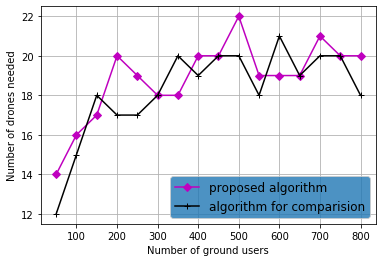

In [73]:
import matplotlib.pyplot as plt 
import numpy as np
users = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800])
drones_1 = np.array([14, 16,17, 20, 19, 18, 18, 20, 20, 22, 19, 19, 19, 21, 20, 20])
drones_2 = np.array([12, 15, 18, 17, 17, 18, 20, 19, 20, 20, 18, 21, 19, 20, 20, 18])
# drones_2 = np.array([])
fig, ax1 = plt.subplots()
ax1.plot(users, drones_1, 'm', marker='D', label = 'proposed algorithm')
ax1.plot(users, drones_2, 'k', marker='+', label = 'algorithm for comparision')
legend = ax1.legend(loc='best', shadow=False, fontsize='large')
# plt.xlabel('Simulation Time')
plt.xlabel('Number of ground users')
plt.ylabel('Number of drones needed')
# ax1.set_xticks(T)
legend.get_frame().set_facecolor('C0')

plt.grid(True)
plt.show()

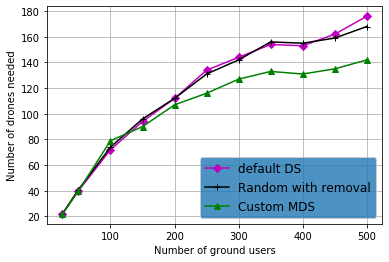

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
users = np.array([25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
drones_DS = np.array([22, 40, 72, 94, 112, 134, 144, 154, 153, 162, 176])
drones_Random = np.array([22, 41, 74, 96, 112, 131, 142, 156, 155, 159, 168])
drones_CustomMDS = np.array([22, 40, 79, 90, 107, 116, 127, 133, 131, 135, 142])
# drones_2 = np.array([])
fig, ax1 = plt.subplots()

ax1.plot(users, drones_DS, 'm', marker='D', label = 'default DS')
ax1.plot(users, drones_Random, 'k', marker='+', label = 'Random with removal')
ax1.plot(users, drones_CustomMDS, 'g', marker='^', label = 'Custom MDS')

legend = ax1.legend(loc='best', shadow=False, fontsize='large')
# plt.xlabel('Simulation Time')
plt.xlabel('Number of ground users')
plt.ylabel('Number of drones needed')
# ax1.set_xticks(T)
legend.get_frame().set_facecolor('C0')

plt.grid(True)
plt.show()